In [ ]:
pip install control

Wn e eta = [4.0, 0.25]
 FT malha aberta=  
          1
---------------------
0.1 s^2 + 0.2 s + 1.6

 FT controlador=  
4 s^2 + 40 s + 40
-----------------
        s

 FT malha fechada=  
       4 s^2 + 40 s + 40
-------------------------------
0.1 s^3 + 4.2 s^2 + 41.6 s + 40



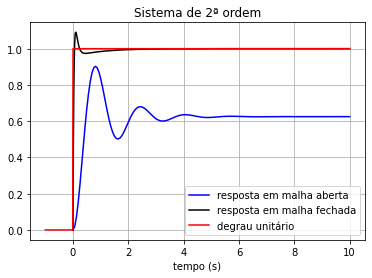

In [3]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# cria a função de transferência em malha aberta
km = 1.6;#constante da mola
massa=0.1;# massa do peso
fv=0.2;#const de amortecimento
Wn = np.sqrt(km/massa)
eta = (fv/massa)/(2*Wn)
print ('Wn e eta =',[Wn, eta])
Tsim=10;
numerador = [1.]
denominador = [massa, fv, km]
P_s = ctl.tf(numerador, denominador)
print(' FT malha aberta= ' ,P_s)
# controlador PID
Ki=10*Wn;Kp=10*Wn;Kd=1*Wn;
#Ki=0;Kp=10;Kd=0;
C_s=ctl.tf([Kd, Kp, Ki],[1., 0.])
#C_s=ctl.tf([Kp],[1.])
print(' FT controlador= ' ,C_s)
# sensor unitário
H_s=ctl.tf([1.],[1.])

#Funcao de transf MF
#G1_s=(C_s*P_s)/(1+C_s*P_s*H_s)
G1_s=ctl.feedback(ctl.series(C_s, P_s), H_s, sign=-1)
print(' FT malha fechada= ' ,G1_s)

#calcula a resposta ao degrau
T, yout = ctl.step_response(P_s, Tsim)
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)
T2=np.linspace(-1.,Tsim,1000)

#calcula um degrau unitário
degrau=np.ones_like(T2)
degrau[T2<0]=0;

#plota os resultados
plt.plot(T,yout,'b-')
plt.plot(T_mf,yout_mf,'k-')
plt.plot(T2,degrau,'r-')
plt.xlabel('tempo (s)')
plt.legend(['resposta em malha aberta','resposta em malha fechada','degrau unitário'])
plt.grid(); plt.title('Sistema de 2ª ordem');